# Core Data Understanding

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
idf=pd.read_csv('hotel LA1 - hotel LA1.csv')

In [76]:
idf.head()

,hardware_id,created_at,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
0,abcdefgh,2019-06-27T23:16:00.000Z,72350.99986,0,406,404,233,236,233,17.125,16.500,18.750
1,abcdefgh,2019-06-27T23:15:00.000Z,72328.45597,0,406,404,233,237,234,17.000,16.500,18.750
2,abcdefgh,2019-06-27T23:13:00.000Z,72306.34808,0,408,404,234,236,234,17.000,16.875,18.750
3,abcdefgh,2019-06-27T23:11:00.000Z,72284.64116,0,406,404,233,236,234,17.125,16.625,18.750
4,abcdefgh,2019-06-27T23:09:00.000Z,72263.26715,0,406,402,232,235,233,17.000,16.750,18.375


In [77]:
idf.drop(['hardware_id','voltage ry','created_at'],axis=1,inplace=True)

In [78]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
Wh            572 non-null float64
voltage yb    572 non-null int64
voltage br    572 non-null int64
Voltage R     572 non-null int64
Voltage Y     572 non-null int64
Voltage B     572 non-null int64
Current R     572 non-null float64
Current Y     572 non-null float64
Current B     572 non-null float64
dtypes: float64(4), int64(5)
memory usage: 40.3 KB


In [79]:
idf.describe()

,Wh,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,66411.311441,405.720280,402.454545,231.984266,235.720280,232.923077,11.330911,11.058239,11.984156
std,3614.438586,3.573409,3.658308,2.267125,2.030953,2.034129,6.327414,6.149625,6.486260
min,59945.008030,398.000000,394.000000,227.000000,231.000000,228.000000,6.250000,6.093750,5.906250
25%,63325.162538,404.000000,400.000000,230.000000,234.000000,231.750000,6.437500,6.281250,7.062500
50%,66859.786005,406.000000,402.000000,232.000000,236.000000,233.000000,6.500000,6.343750,7.218750
75%,69457.583840,408.000000,404.000000,233.250000,237.000000,234.000000,19.875000,19.250000,20.250000
max,72350.999860,416.000000,412.000000,238.000000,241.000000,239.000000,20.750000,20.625000,22.000000


In [80]:
#All the columns names
idf.columns

Index(['Wh', 'voltage yb', 'voltage br', 'Voltage R', 'Voltage Y', 'Voltage B',
       'Current R', 'Current Y', 'Current B'],
      dtype='object')

# Data Visualization B/w various factors of Data 

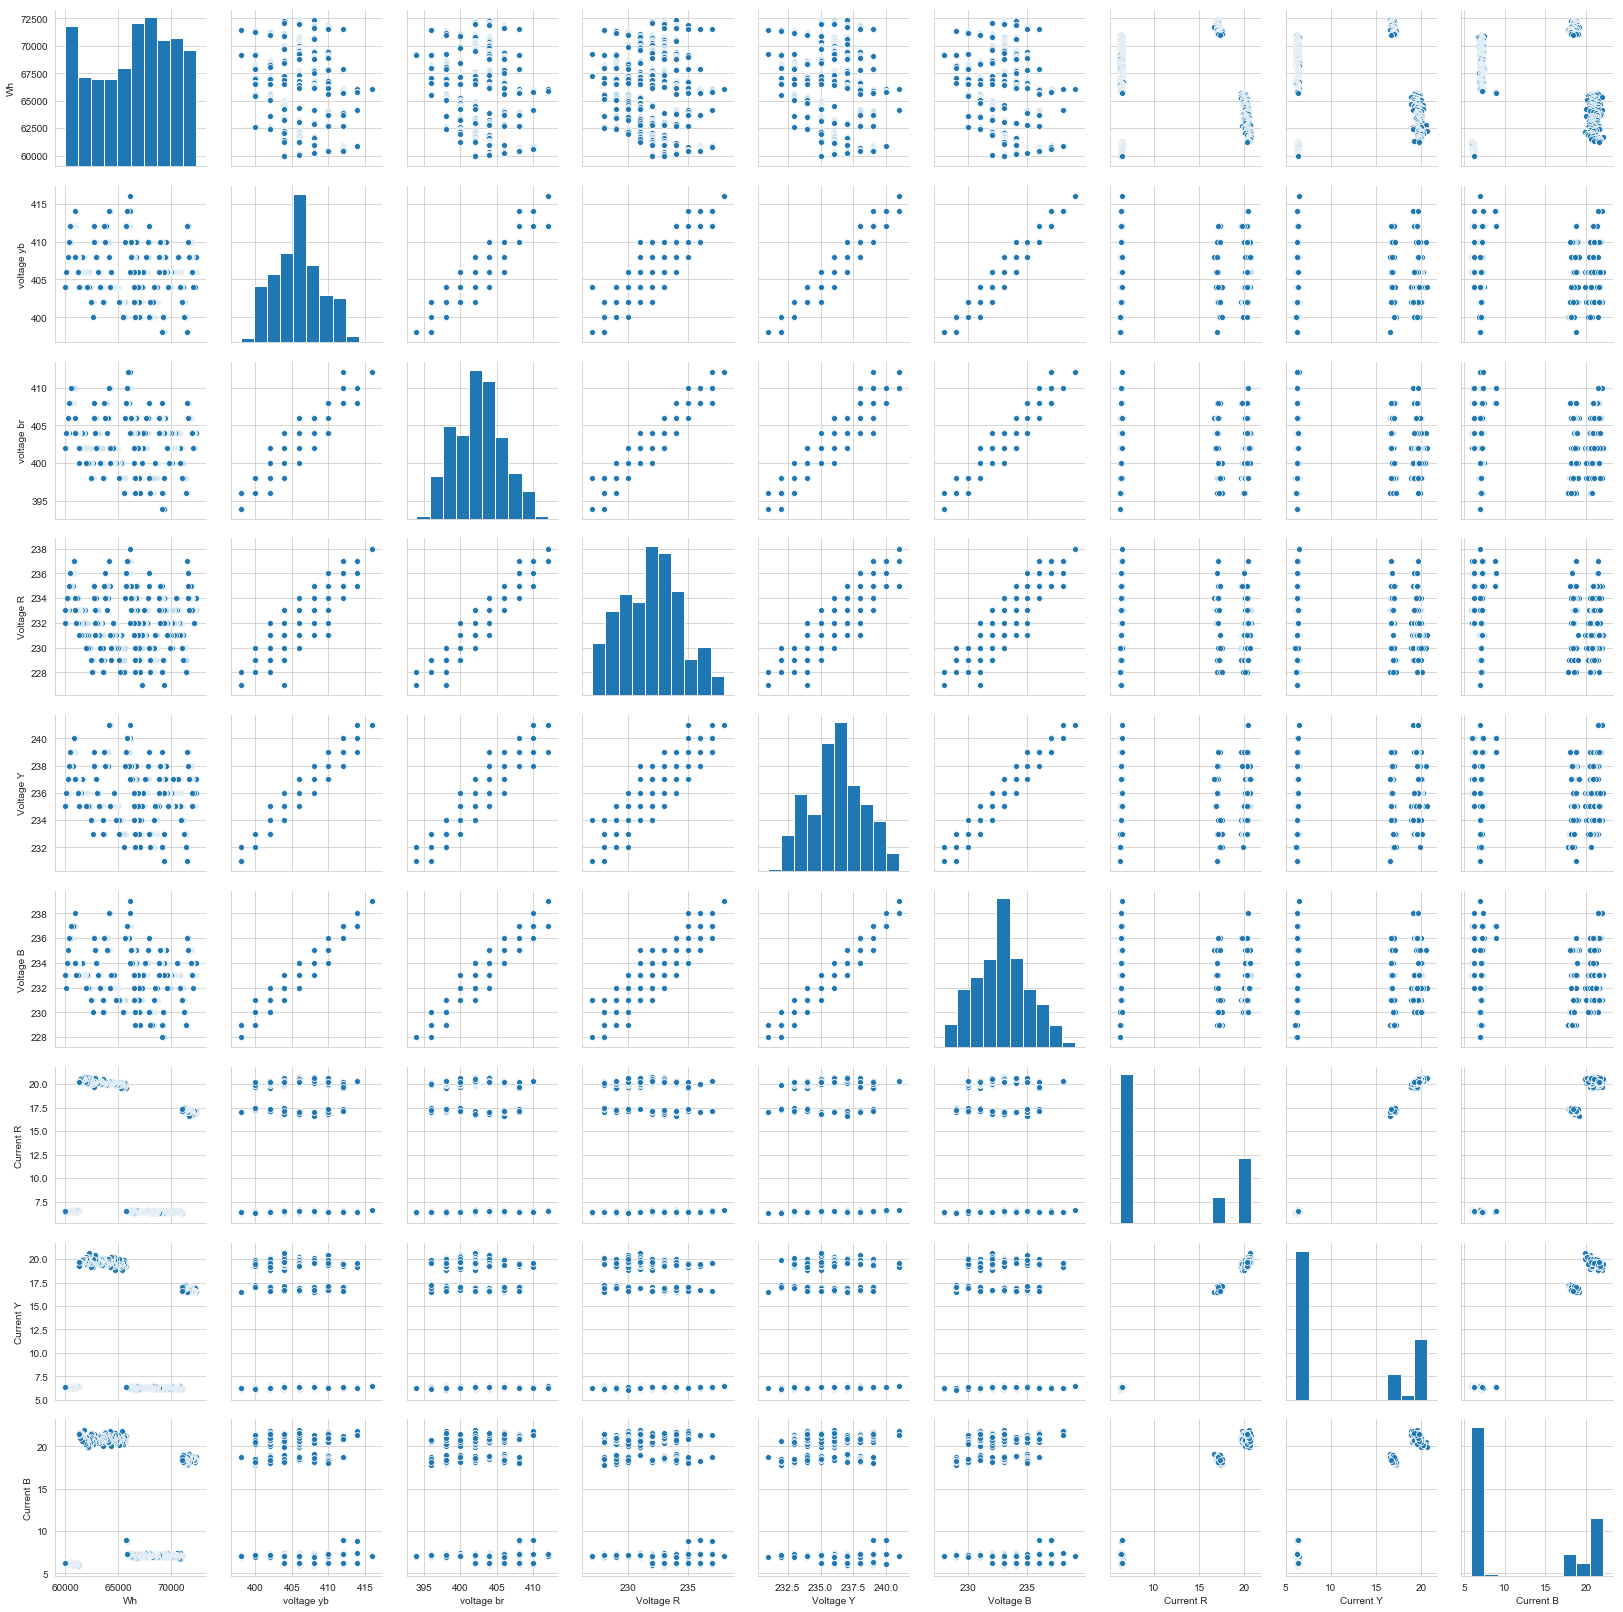

In [81]:
sns.pairplot(idf)

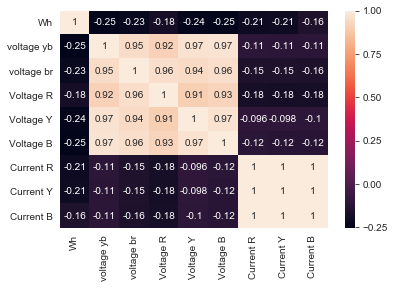

In [82]:
#Heatmap for all Data column
sns.heatmap(idf.corr(),annot=True)

Text(0, 0.5, 'Number of outcome')

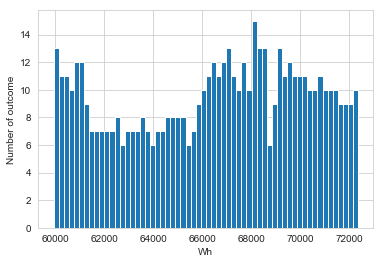

In [83]:
sns.set_style('whitegrid')
idf['Wh'].hist(bins=60)
plt.xlabel('Wh')
plt.ylabel('Number of outcome')

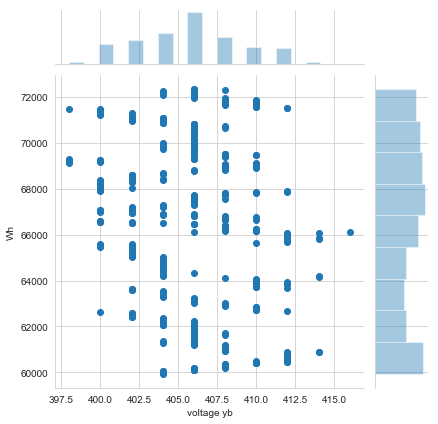

In [84]:
#Relation b/w Voltage yb & Wh
sns.jointplot(x='voltage yb',y='Wh',data=idf)

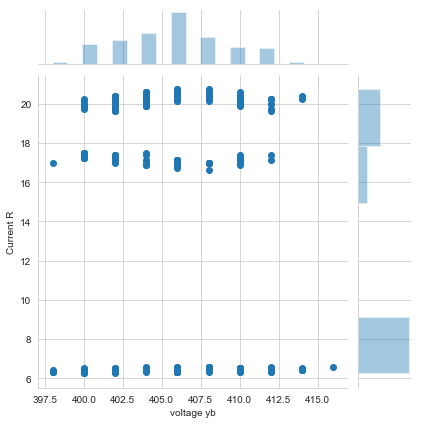

In [85]:
#Relation b/w Voltage yb & current R
sns.jointplot(x='voltage yb',y='Current R',data=idf)

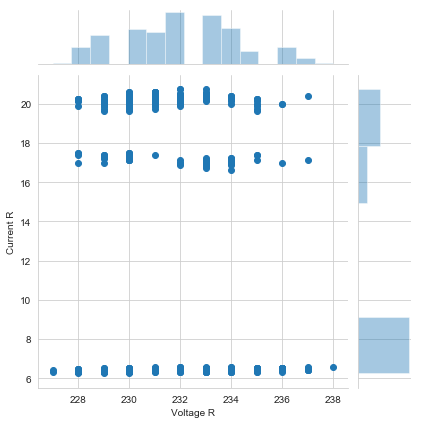

In [86]:
#Relation b/w Voltage R & current R
sns.jointplot(x='Voltage R',y='Current R',data=idf)

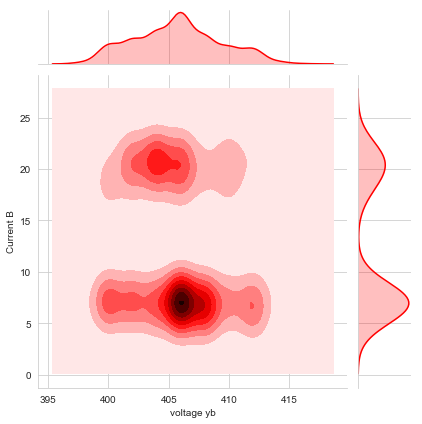

In [87]:
sns.jointplot(x='voltage yb',y='Current B',data=idf,color='red',kind='kde')

# Best fitted B/w Wh and other Column.

In [89]:
X = idf[[ 'voltage yb',
       'voltage br', 'Voltage R', 'Voltage Y', 'Voltage B', 'Current R','Current Y', 'Current B']]    #columns Taking value
y = idf['Wh']                                                                                         #Predicting value

In [90]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)   #split the data

In [91]:
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)      #fit the model in X and y train


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted Y')

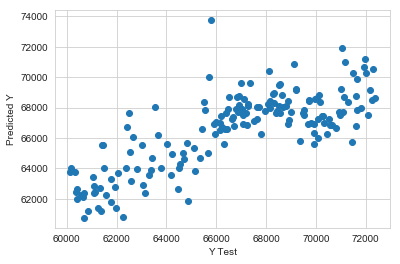

In [93]:
#Predictions from our Model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [94]:
# calculate these metrics by for regression for error calculation
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1718.9111962745228
MSE: 4926473.156748879
RMSE: 2219.5659838691163
